#### Implemnting a chatbot using LangGraph

In [23]:
from typing_extensions import TypedDict
from langgraph.graph import END, START,StateGraph
### Reducers 
from typing import Annotated
from langgraph.graph.message import add_messages



In [25]:
class State(TypedDict):
    messages:Annotated[list,add_messages]



In [27]:
import os 
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

llm_openai = ChatOpenAI(model_name="gpt-4o", temperature=0.0)
llm_openai.invoke("Hello, how are you?")

#model.invoke("Hello, how are you?")

AIMessage(content="Hello! I'm just a computer program, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 13, 'total_tokens': 43, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_deacdd5f6f', 'id': 'chatcmpl-CshyLIRptxcWjyyOu9x37ag3AerbG', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--3949f647-1ff6-4e6f-9c8f-55097f7415a8-0', usage_metadata={'input_tokens': 13, 'output_tokens': 30, 'total_tokens': 43, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [28]:
from langchain_groq import ChatGroq
os.environ["GROQ_API_KEY"] =os.getenv("GROQ_API_KEY")
llm_groq = ChatGroq(model="llama-3.1-8b-instant")
llm_groq.invoke("Hello ,My name is AJay and I love learning data engineering")

AIMessage(content="Nice to meet you, AJay. Data engineering is a fascinating field that combines computer science, programming, and data analysis to design, build, and maintain large-scale data systems. It's an exciting field with a wide range of applications in industries such as healthcare, finance, e-commerce, and more.\n\nWhat aspects of data engineering interest you the most? Are you looking to build skills in specific areas such as:\n\n1. Distributed computing (e.g., Hadoop, Spark)?\n2. Data warehousing (e.g., AWS Redshift, Snowflake)?\n3. Streaming data processing (e.g., Apache Kafka, Apache Flink)?\n4. Data integration (e.g., ETL, ELT)?\n5. Cloud platforms (e.g., AWS, GCP, Azure)?\n\nLet me know, and I'd be happy to help you explore and learn more about data engineering!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 179, 'prompt_tokens': 48, 'total_tokens': 227, 'completion_time': 0.432164284, 'completion_tokens_details': None, 'prompt_time': 0

#### Node creation 

In [29]:
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

#### Graph Construction

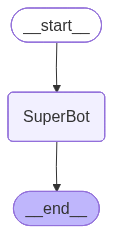

In [31]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile()


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))


In [33]:
graph_builder.invoke({'messages':"Hi,My name is Ajay And I like cricket"})

{'messages': [HumanMessage(content='Hi,My name is Ajay And I like cricket', additional_kwargs={}, response_metadata={}, id='ecc0a8c7-b0c9-4557-90b8-c6784df1dc3e'),
  AIMessage(content="Nice to meet you, Ajay. It's great to hear that you like cricket. Cricket is a fantastic sport with a huge following around the world. Who's your favorite cricketer or team? Are you a fan of international cricket or do you follow domestic leagues like the Indian Premier League (IPL)?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 64, 'prompt_tokens': 46, 'total_tokens': 110, 'completion_time': 0.189540869, 'completion_tokens_details': None, 'prompt_time': 0.00404617, 'prompt_tokens_details': None, 'queue_time': 0.006766895, 'total_time': 0.193587039}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_020e283281', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--51a36096-b8e2-4bce-ad41-8fc290a335ed

In [34]:
graph_builder.invoke({'messages':"Hi,My name is Ajay And I love data engineering"})

{'messages': [HumanMessage(content='Hi,My name is Ajay And I love data engineering', additional_kwargs={}, response_metadata={}, id='3a2ef8d8-bef3-4b75-8064-3fa7b5dc6b3a'),
  AIMessage(content="Nice to meet you, Ajay. Data engineering is a fascinating field that involves designing, building, and maintaining the infrastructure that enables the collection, processing, and storage of large amounts of data. It's a crucial role in the data science ecosystem, and there's always a high demand for skilled data engineers.\n\nWhat specific areas of data engineering interest you the most? Are you working on any projects or have any favorite tools and technologies, such as Apache Beam, Apache Spark, AWS Glue, or Google Cloud Dataflow?\n\nAlso, have you considered any of the following certifications to enhance your skills and career prospects?\n\n- Certified Data Engineer (CDE) by Google Cloud\n- Certified Associate in Data Science (CADS) by Data Science Council of America\n- Certified Analytics Pr

## Streaming the response

In [38]:
#from httpx import stream


for event in  graph_builder.stream({"messages": "Hello,My Name is Ajay and i love data engineerings?"}):
    print(event)
    

{'SuperBot': {'messages': [AIMessage(content="Hello Ajay, nice to meet you. Data engineering is a fascinating field that involves designing, building, and maintaining the infrastructure that enables organizations to collect, process, and analyze large datasets. It's a crucial role in the data science ecosystem, as it lays the foundation for data-driven decision-making.\n\nAs a data engineer, you'll work with various technologies, such as Hadoop, Spark, NoSQL databases, and cloud platforms, to design scalable and efficient data pipelines. Your tasks might include:\n\n1. Building data warehouses and data lakes\n2. Designing data pipelines and workflows\n3. Ensuring data quality and integrity\n4. Developing data processing and ETL (Extract, Transform, Load) tools\n5. Integrating with cloud services and APIs\n\nWhat aspect of data engineering excites you the most, Ajay? Are you interested in working with a particular technology or industry?", additional_kwargs={}, response_metadata={'token